# Task 1 - Data Cleaning 
 

### Problem Statement :

- Conduct data cleaning procedures on the Titanic dataset to enhance its       quality by addressing missing values and outliers.

## Solution 

### Data Cleaning - 

- Data cleaning is the process of identifying and fixing errors, inconsistencies, and missing values in a dataset to make it       accurate, reliable, and suitable for analysis.
    
- Common Operations involved in Data Cleaning 
    * Handling Missing Values
    * Removing Duplicates
    * Standardizing Data
    * Correcting Errors
    * Handling Outliers, etc.
    
    
### Various Technologies that can be used to perform Data Cleaning -
- Python Libraries [ Pandas, Numpy, etc ] 
- R Programming    [ Tidyverse, data.table, etc ] 
- SQL 
- Excel and Spreadsheets 
- Apache Spark     [ Particularly useful for large-scale data cleaning tasks ]
- Other Platforms  [ Trifacta, Informatica, etc ] 




* For this task, we are using Pandas for its efficient handling of missing values, its versatile data transformation capabilities, and its extensive range of functions tailored for diverse data cleaning operations. 
  
  

In [1]:
# Importing Pandas Library 

import pandas as pd 

In [2]:
# Loading the Titanic DataSet 

# Since the dataset is in .csv format using Pandas function pd.read_csv() to load the dataset 

df = pd.read_csv('Titanic.csv')

In [3]:
# Displaying the first few rows of the Titanic DataFrame 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Getting the shape (rows,cols) of the DataFrame

df.shape

(891, 12)

In [5]:
# Identifying the Missing Values and calculating their sum  

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above we can see that, three columns have missing values 
- Age       : 177 Missing Vals
- Cabin     : 687 Missing Vals
- Embarked  : 2 Missing Vals 

In [6]:
# Getting the DataTypes of the Missing Values Columns 

df[['Age','Cabin','Embarked']].dtypes

Age         float64
Cabin        object
Embarked     object
dtype: object

In [7]:
# ShortMethod to Identify the Missing Vals and get their dataTypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Upon observing the above output, we can conclude that - 

* 'Age' column has a significant number (177) of missing values, impacting     its completeness for analysis.
* 'Cabin' column is highly incomplete, with a vast majority (687 out of 891)   of missing values, limiting its utility in analysis unless handled appropriately.
* 'Embarked' column has a minor number (2) of missing values, which might not   significantly affect its usability for analysis purposes.

## Handling Missing Values 


- Handling missing values involves dealing with instances in a dataset where information or data points are absent or not         recorded.
  
  Common Methods for Handling Missing Values are : 
  1. Drop the Missing Values:
       - Approach: This method involves removing rows or columns that contain missing values.
       - Usage: dropna() function in pandas or similar functions in other libraries.
       - Action: Drops entire rows or columns that contain any missing values (NaN/null) based on the specified axis.
       - Pros: Helps maintain data integrity by removing incomplete records.
       - Cons: Reduces dataset size, potentially leading to loss of information if missing values are not random.
      
   2. Imputation using fillna() Function:
        - Approach: Imputation involves filling missing values with substitutes, such as mean, median, mode, constant value, or                     using more advanced methods like interpolation.
        - Usage: fillna() function in pandas or equivalent methods in other libraries.
        - Action : Based on the nature of data, missing values can be replaced by the following :- 
            1. Mean   - Suitable for continuous numerical data when there are no outliers affecting the average. However, it's                           sensitive to extreme values.
            2. Median - Less affected by outliers, making it suitable for managing skewed or outlier-prone data.
            3. Mode   - Ideal for categorical or nominal data. It's the most frequently occurring value.
        - Pros: Retains data structure and size, preserving information for analysis.
        - Cons: Imputed values might introduce bias or distort the original data distribution if not carefully chosen.                  
   Numerous alternative techniques exist to manage missing values, such as Regression Imputation, K-Nearest Neighbors Imputation, and several others.         

#### Now let's Handle the Missing Values present in the three columns of our Titanic DataSet
- We will be using Imputation Method to handle the missing values


In [ ]:
### Age Column 

''' Since Age column is of Float dataType, we can substitute the missing values with Mean or Median 
    depending upon the presence of outliers
'''

The simplest way to check the presence of outliers is by visualizing the data using histogram

'''
    For creating a histogram we need to import Matplotlib 
'''


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

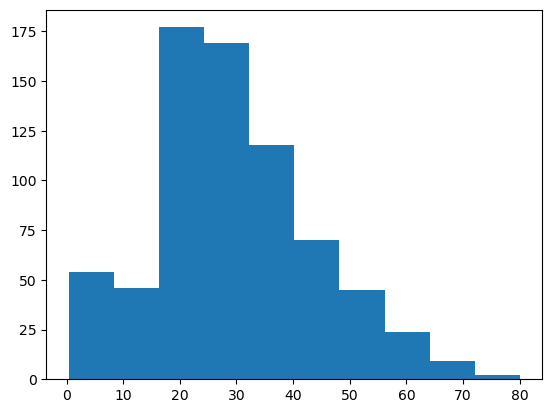

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

# Creating a histogram of Age col 
plt.hist(df['Age'])

- Outliers are the data points that significantly differ from other observations in a dataset. Based on the histogram, it appears that there are no data points in the Age column that significantly differ from the rest, suggesting the absence of outliers.

So we can use Mean value of the Age col for Imputation Operation 

In [4]:
# Getting the Mean of the Age col 
mean_age = df['Age'].mean()

# Using fillna() function for Imputation 
df['Age'].fillna(mean_age,inplace=True)

'''
    'inplace=True' modifies the DataFrame directly without creating a new copy, applying changes within the 
     same DataFrame.
'''

In [5]:
# Again calculating the count of missing values in Age col 

df['Age'].isna().sum()

0

Missing_val_count = 0 indicates that we have successfully dealed with all the missing values that were present in Age col  

Similarly, we can handle missing values of Embraked and Cabin col 

Since, both Embraked and Cabin col are of Object dataType, we can use Mode of the respective columns for Imputation

In [10]:
# Embraked Column 

# Getting the mode 
embarked_mode_val = df['Embarked'].mode()

# Using fillna() function 
df['Embarked'].fillna(embarked_mode_val[0],inplace=True)

In [11]:
# Calculating the count of missing values in Embraked col 

df['Embarked'].isna().sum()

0

In [14]:
# Cabin Column 

# Getting the mode 
cabin_mode_list = df['Cabin'].mode()

cabin_mode_list

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

mode() function in pandas returns Multiple mode values.

In [19]:
# Accessing the first mode 
cabin_mode_val = cabin_mode_list[0]

cabin_mode_val

'B96 B98'

The above output indicates that, both 'B96' and 'B98' have same frequency i.e. they both are possible modes of the Cabin column

In [21]:
# Getting the total count of all the unique values that are present in 
# Cabin column

df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

From the above output, it is clear that their are multiple modes for Cabin colum.
So we can use any of the possible mode value for Imputation 

In [22]:
# Handling the missing vals of Cabin col 

df['Cabin'].fillna('B96',inplace=True)

In [23]:
# Getting the total count of missing val

df['Cabin'].isna().sum()

0

In [24]:
# Getting the overall missing val count 

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Therefore, we have successfully handled all the missing values 